In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_flight = pd.read_csv("flight-delays\\flights.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_flight.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
#df_new = df_flight[df_flight['DEPARTURE_DELAY']<0]

In [7]:
#df_new.groupby('AIRLINE')['DEPARTURE_DELAY'].agg(['size','mean','max','min'])

In [8]:
#df_new['IS_LATE'] = df_new['DEPARTURE_DELAY']<0

In [9]:
#df_new.groupby(['ORIGIN_AIRPORT'])['TAXI_OUT'].agg(['size','mean','max','min']).sort_values(by='mean', ascending=False)

In [10]:
tab_info = pd.DataFrame(df_flight.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df_flight.isnull().sum()).T.rename(index={0:'null values'}))
tab_info = tab_info.append(pd.DataFrame(100*df_flight.isnull().sum()/df_flight.shape[0]).T.rename(index={0:'perc null values'}))
tab_info.dtypes


YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        object
TAXI_OUT               object
WHEELS_OFF             object
SCHEDULED_TIME         object
ELAPSED_TIME           object
AIR_TIME               object
DISTANCE               object
WHEELS_ON              object
TAXI_IN                object
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          object
DIVERTED               object
CANCELLED              object
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       object
SECURITY_DELAY         object
AIRLINE_DELAY          object
LATE_AIRCRAFT_DELAY    object
WEATHER_DELAY          object
dtype: object

In [11]:
tab_info.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,int64,...,float64,float64,int64,int64,object,float64,float64,float64,float64,float64
null values,0,0,0,0,0,0,14721,0,0,0,...,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640
perc null values,0,0,0,0,0,0,0.252978,0,0,0,...,1.58982,1.80563,0,0,98.4554,81.725,81.725,81.725,81.725,81.725


In [12]:
perc_null = tab_info.iloc[2]
perc_null_columns = perc_null.index
null_columns = [x for x in perc_null_columns if perc_null[x]>70] 

In [13]:
df_new = df_flight.drop(axis=1,columns=null_columns)
df = df_new.dropna(axis=0,how='any')
df.shape

(5714008, 25)

In [14]:
#df.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT','AIRLINE']).agg('size').sort_values(ascending=False)
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH','DAY']])
df = df.drop(axis=1,columns=['YEAR','MONTH','DAY'])
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,2015-01-01


In [15]:
## Delay with respect to departure time
## During early morning, less flights gets delayed. During busy time, more flights gets delayed

early_morning_flights = df[(df['SCHEDULED_DEPARTURE'] >200) & (df['SCHEDULED_DEPARTURE'] <800)]
total_flights = early_morning_flights.shape[0]
late_flights = early_morning_flights[early_morning_flights['DEPARTURE_DELAY']>10].shape[0]
per_late = late_flights/total_flights
per_late

0.08967900306290567

In [16]:
## Departure delay with respect to different airlines

df.groupby('AIRLINE')['DEPARTURE_DELAY'].agg(['size','mean','max','min'])

,size,mean,max,min
AIRLINE,,,,
AA,712935,8.826106,1988.0,-68.0
AS,171439,1.718926,963.0,-82.0
B6,262042,11.442467,1006.0,-31.0
DL,870275,7.313300,1289.0,-61.0
EV,554752,8.615598,1236.0,-55.0
F9,90090,13.303352,1112.0,-46.0
HA,76041,0.469918,1433.0,-27.0
MQ,278791,9.967187,1544.0,-36.0
NK,115193,15.883101,836.0,-37.0


In [17]:
df_early = df[df['DEPARTURE_DELAY']<0]
df_early.groupby('AIRLINE')['DEPARTURE_DELAY'].agg(['count','mean','min','max'])

,count,mean,min,max
AIRLINE,,,,
AA,434879,-4.775857,-68.0,-1.0
AS,121005,-6.827974,-82.0,-1.0
B6,146884,-5.524019,-31.0,-1.0
DL,521756,-3.747482,-61.0,-1.0
EV,364442,-5.694056,-55.0,-1.0
F9,52058,-6.687733,-46.0,-1.0
HA,52794,-5.721635,-27.0,-1.0
MQ,170992,-5.403241,-36.0,-1.0
NK,58576,-5.845619,-37.0,-1.0


In [18]:
## Most number of flights between pair of airports

temp = df.groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])['AIRLINE'].agg('count').sort_values(ascending=False)
temp[:5]


ORIGIN_AIRPORT  DESTINATION_AIRPORT
SFO             LAX                    13400
LAX             SFO                    13109
JFK             LAX                    11853
LAX             JFK                    11851
LAS             LAX                     9651
Name: AIRLINE, dtype: int64

In [19]:
## Percentage of flights that gets delayed by 10 mins from CHO airport

a1 = (df[(df['DEPARTURE_DELAY']>0) & (df['ORIGIN_AIRPORT'].str.contains('CHO'))].shape[0])
a2 = df[df['ORIGIN_AIRPORT'].str.contains('CHO') == True].shape[0]

a1/a2




0.3011472275334608

In [20]:
## Airports with atleast 10k flights in the order of their delayed flights percentage

df_late = df[df['DEPARTURE_DELAY'] > 0]
late_count = df_late.groupby('ORIGIN_AIRPORT')['AIRLINE'].agg('count')
total_count = df.groupby('ORIGIN_AIRPORT')['AIRLINE'].agg('count')

airport_list = total_count.index.unique()
big_airport = [airport for airport in airport_list if total_count[airport] > 10000]

perc_late = [late_count[airport]/total_count[airport] for airport in big_airport]

perc_late_dict = {"Airport" : big_airport, "Late percentage" : perc_late}

df_prec_late = pd.DataFrame(perc_late_dict).sort_values('Late percentage', ascending = False)

df_prec_late[:10]





,Airport,Late percentage
26,DAL,0.524628
50,MDW,0.516782
20,BWI,0.494278
36,HOU,0.490652
28,DEN,0.459530
56,OAK,0.453911
32,EWR,0.452304
61,ORD,0.437246
43,LAS,0.430577
37,IAD,0.430490


In [21]:
## taxi_out time vs. big airport

df_taxi = df[df['ORIGIN_AIRPORT'].isin(big_airport)]
df_taxi.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].agg('mean').sort_values(ascending=False)[:5]


ORIGIN_AIRPORT
JFK    26.995582
LGA    26.711306
PHL    21.691279
EWR    20.177708
BOS    20.005506
Name: TAXI_OUT, dtype: float64

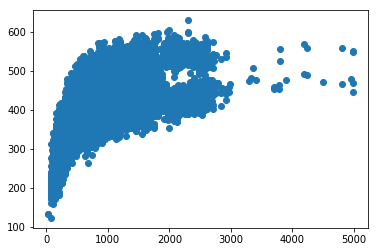

In [24]:
## Avg. speed vs distance
## As the distance increases, speed increases

speed = 60*df['DISTANCE']/df['AIR_TIME']
dist = df['DISTANCE']

a=dist[:10000]
b=speed[:10000]
plt.scatter(a,b)

In [25]:
## Cancellation reason for cancelled flights
df_cancel = df_flight[df_flight['CANCELLED']==1]
df_cancel.groupby(['CANCELLATION_REASON'])['CANCELLED'].agg('count')

CANCELLATION_REASON
A    25262
B    48851
C    15749
D       22
Name: CANCELLED, dtype: int64

In [232]:
## Weather affect for different months
## Most flights gets cancelled during winter for weather reasons

df_weather = df_flight[df_flight['CANCELLATION_REASON']=='B']
df_weather.groupby('MONTH')['CANCELLED'].agg('count').sort_values(ascending=False)

MONTH
2     15447
1      7020
3      6864
12     5613
6      3325
5      2780
11     2339
4      1789
8      1310
10      977
7       882
9       505
Name: CANCELLED, dtype: int64

In [38]:
## Which Airline Cancels flights the most
## but need to check their percentage of cancellation

df_airline_cancel = df_flight[df_flight['CANCELLATION_REASON']=='A']
df_airline_cancel = df_airline_cancel.groupby(['AIRLINE'])['CANCELLED'].agg('count').sort_values(ascending=False)
df_airline_cancel

AIRLINE
WN    6122
EV    3604
OO    3205
AA    2879
UA    2870
MQ    2475
US    1007
B6     883
NK     654
DL     594
AS     334
F9     308
HA     170
VX     157
Name: CANCELLED, dtype: int64

In [43]:
## Calculating cancel percentage

df_airline_count = df_flight.groupby('AIRLINE')['FLIGHT_NUMBER'].agg('count')
airline_list = df_airline_count.index.unique()


airline_cancel_perc = [100*df_airline_cancel[airline]/df_airline_count[airline] for airline in airline_list]
airline_cancel_dict = {'Airline':airline_list, 'Cancel Percentage':airline_cancel_perc}
df_airline_cancel_perc = pd.DataFrame(airline_cancel_dict)
df_airline_cancel_perc = df_airline_cancel_perc.sort_values(by='Cancel Percentage',ascending=False)
df_airline_cancel_perc


,Airline,Cancel Percentage
7,MQ,0.840031
4,EV,0.630095
8,NK,0.557170
10,UA,0.556500
9,OO,0.544741
11,US,0.506756
13,WN,0.485159
0,AA,0.396565
5,F9,0.339073
2,B6,0.330652


(array([3.3588e+04, 4.5041e+04, 9.7240e+03, 2.1230e+03, 7.0100e+02,
        2.7700e+02, 1.1700e+02, 7.2000e+01, 1.8000e+01, 2.0000e+00]),
 array([  3. ,  20.7,  38.4,  56.1,  73.8,  91.5, 109.2, 126.9, 144.6,
        162.3, 180. ]),
 <a list of 10 Patch objects>)

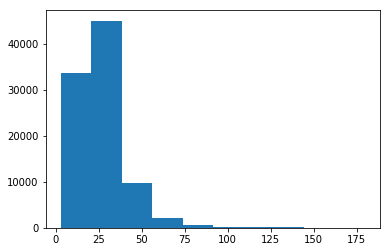

In [44]:
#df.groupby('ORIGIN_AIRPORT')['TAXI_OUT'].agg(['count','mean','min','max']).sort_values(by='mean',ascending=False
## Bigger airports have larger taxi out time
jfk = df[df['ORIGIN_AIRPORT']=='JFK']
plt.hist(jfk['TAXI_OUT'])
                                                                                       

In [11]:
## taxi_out delay for different airlines at JFK
jfk.groupby('AIRLINE')['TAXI_OUT'].agg(['count','mean','min','max'])

,count,mean,min,max
AIRLINE,,,,
AA,15238,25.780877,3.0,152.0
AS,75,28.480000,11.0,73.0
B6,39587,26.048097,5.0,159.0
DL,25037,29.804649,3.0,180.0
HA,293,23.703072,9.0,78.0
MQ,3236,26.672435,5.0,136.0
UA,3238,26.578135,7.0,139.0
US,1359,24.533481,10.0,114.0
VX,3600,24.852222,8.0,137.0


In [41]:
## Speed vs taxi out delay
jfk_san = df[(df['ORIGIN_AIRPORT']=='JFK') & (df['DESTINATION_AIRPORT']=='SAN')]
taxi_out_max = jfk_san['TAXI_OUT'].max()
delay_range = np.arange(0,taxi_out_max,taxi_out_max/8)
jfk_san['TAXI_OUT_RANGE'] = pd.cut(jfk_san['TAXI_OUT'],delay_range)

jfk_san.groupby('TAXI_OUT_RANGE')['AIR_TIME'].agg(['count','mean'])

## Output is like a parabola

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,count,mean
TAXI_OUT_RANGE,,
"(0.0, 19.0]",380,332.805263
"(19.0, 38.0]",910,324.531868
"(38.0, 57.0]",279,322.136201
"(57.0, 76.0]",68,322.279412
"(76.0, 95.0]",25,325.560000
"(95.0, 114.0]",5,334.000000
"(114.0, 133.0]",1,325.000000


In [45]:
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder

In [46]:
## Now study the training and prediction
## Modeling the departure delay

def get_flight_delays(df,airline,airport_id):
    df_res = df[(df['AIRLINE']==airline) & (df['ORIGIN_AIRPORT']==airport_id)]
    test = df_res[df_res['DEPARTURE_DELAY']<50]
    test = test.groupby('SCHEDULED_DEPARTURE')['DEPARTURE_DELAY'].agg(['mean','count'])
    test.reset_index(inplace=True)    
    return test[['SCHEDULED_DEPARTURE','mean']]



31.541852900747426

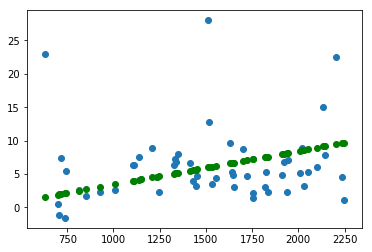

In [50]:
## Training on data from first 3 weeks of January
## And predicting on last week of January

df_train = df[(df['DATE']>'2015-1-01') & (df['DATE']<'2015-1-25')]
df_train = df_train[df_train['DEPARTURE_DELAY']<50]
test = get_flight_delays(df_train,'AA','DFW')
X = test['SCHEDULED_DEPARTURE']
X = X.values.reshape(len(X),1)
y = test['mean']
y = y.values.reshape(len(y),1)

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.25,random_state=42)

linreg = linear_model.LinearRegression()

linreg.fit(train_X,train_Y)
test_pred = linreg.predict(test_X)


plt.scatter(test_X,test_Y)
plt.scatter(test_X,test_pred,color='g')


mean_squared_error(test_Y,test_pred)


In [55]:
## Now adding Polynomial Features

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
train_X,test_X,train_Y,test_Y = train_test_split(X_poly,y,test_size=0.25,random_state=42)
linreg.fit(train_X,train_Y)
test_pred = linreg.predict(test_X)

mean_squared_error(test_Y,test_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

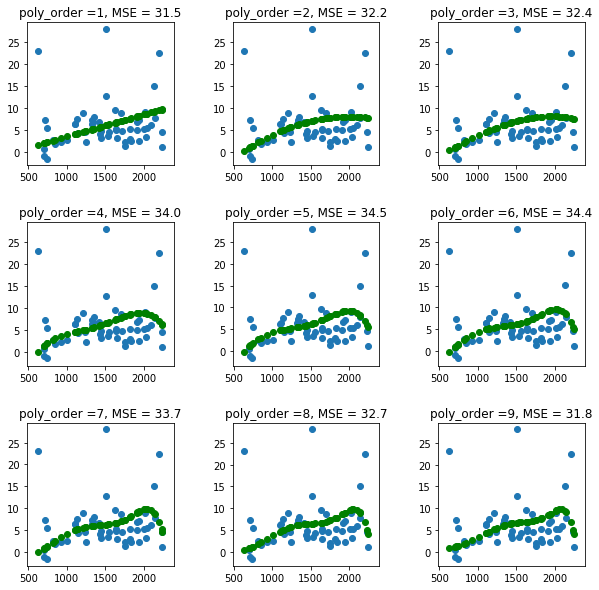

In [54]:
## Plotting MSE vs Polynomial Features

def get_mse(pred,out):
    return mean_squared_error(pred,out)

num_feature=[1,2,3,4,5,6,7,8,9]
mse_list = []

fig,axes = plt.subplots(3,3)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
count = 0

for num in num_feature:
    poly = PolynomialFeatures(num)
    x_poly = poly.fit_transform(X)
    train_x,test_x,train_y,test_y = train_test_split(x_poly,y,test_size=0.25,random_state=42)
    linreg = linear_model.LinearRegression()
    linreg.fit(train_x,train_y)
    pred = linreg.predict(test_x)
    mse = get_mse(pred,test_y)
    mse_list.append(mse)
    
    i = count//3
    j = count%3
    base = test_x[:,1].reshape(len(test_x[:,1]),1)
    axes[i,j].scatter(base,test_y)
    axes[i,j].scatter(base,pred,color='g')
    axes[i,j].set_title('poly_order ={}, MSE = {:.1f}'.format(num,mse))
    count = count +1

fig.set_size_inches(10,10)

#plt.plot(num_feature,mse_list)
 

In [57]:
## Now Predicting on the out of sample data

df_test = df[(df['DATE']>'2015-1-26') & (df['DATE']<'2015-1-31')]
df_test = df_test[(df_test['ORIGIN_AIRPORT'] == 'DFW') & (df_test['AIRLINE'] == 'AA')]

test_X = df_test['SCHEDULED_DEPARTURE']
test_X = test_X.values.reshape(len(test_X),1)
test_y = df_test['DEPARTURE_DELAY']
test_y = test_y.values.reshape(len(test_y),1)


poly = PolynomialFeatures(2)
x_poly = poly.fit_transform(X)
test_X_poly = poly.fit_transform(test_X)
linreg = linear_model.LinearRegression()
linreg.fit(x_poly,y)
test_pred = linreg.predict(test_X_poly)

mean_squared_error(test_pred,test_y)

400.0774044851175

In [58]:
## Using Cross Validation instead of train_test_split

linreg = linear_model.LinearRegression()
scores = cross_val_score(linreg,X,y,cv=5,scoring='neg_mean_squared_error')
np.mean(scores)

-27.927064951697822

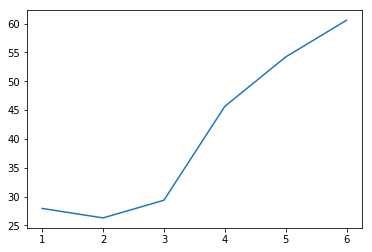

In [61]:
## Deciding polynomial order using cross validation score

num_features = [1,2,3,4,5,6]
mse_list = []

for num in num_features:
    poly = PolynomialFeatures(num)
    X_poly = poly.fit_transform(X)
    linreg = linear_model.LinearRegression()
    mse = np.mean(cross_val_score(linreg,X_poly,y,cv=5,scoring='neg_mean_squared_error'))
    mse_list.append(-1*mse)
    
plt.plot(num_features,mse_list)


In [63]:
## Feature Engineering; Adding Week day as an additional feature
## And studying the effect of Week day on departure delay

df_train1 = df[(df['AIRLINE']=='AA') & (df['ORIGIN_AIRPORT'] == 'DFW')]
df_train1 = df_train1[(df_train1['DATE'] > '2015-01-01') & (df_train1['DATE'] < '2015-05-25')]
df_train1 = df_train1[df_train1['DEPARTURE_DELAY']<50]
test1 = df_train1.groupby(['SCHEDULED_DEPARTURE','DAY_OF_WEEK'])['DEPARTURE_DELAY'].agg(['count','mean'])
test1.reset_index(inplace=True)

In [64]:
X1 = test1[['SCHEDULED_DEPARTURE','DAY_OF_WEEK']]
y1 = test1['mean']
y1 = y1.values.reshape(len(y1),1)


In [73]:
linreg = linear_model.LinearRegression()

train_X1,test_X1,train_Y1,test_Y1 = train_test_split(X1,y1,test_size=0.25,random_state=42)
linreg.fit(train_X1,train_Y1)
test_pred1 = linreg.predict(test_X1)
mean_squared_error(test_Y1,test_pred1)

58.89561673587697

In [74]:
np.mean(cross_val_score(linreg,X1,y1,cv=5,scoring='neg_mean_squared_error'))

-57.498617837484005

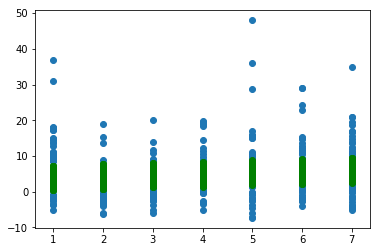

In [75]:
plt.scatter(test_X1['DAY_OF_WEEK'],test_Y1)
plt.scatter(test_X1['DAY_OF_WEEK'],test_pred,color='g')

In [78]:
poly = PolynomialFeatures(1)
X1_poly = poly.fit_transform(X1)

train_X1,test_X1,train_Y1,test_Y1 = train_test_split(X1_poly,y1,test_size=0.25,random_state=42)
linreg.fit(train_X1,train_Y1)
test_pred1 = linreg.predict(test_X1)
mean_squared_error(test_Y1,test_pred1)

58.895616735876985

In [82]:
## Now Predicting on the out of sample data

df_test1 = df[(df['DATE']>'2015-1-26') & (df['DATE']<'2015-1-31')]

df_test1 = df_test1[(df_test1['AIRLINE'] == 'AA') & (df_test1['ORIGIN_AIRPORT'] == 'DFW')]

test_X1 = df_test1[['SCHEDULED_DEPARTURE','DAY_OF_WEEK']]
test_y1 = df_test1['DEPARTURE_DELAY']
test_y1 = test_y1.values.reshape(len(test_y1),1)


poly = PolynomialFeatures(1)
test_X1_poly = poly.fit_transform(test_X1)
linreg = linear_model.LinearRegression()
linreg.fit(X1_poly,y1)
test_pred1 = linreg.predict(test_X1_poly)
mean_squared_error(test_pred1,test_y1)

393.48309922979473

In [83]:
## Inlcuding Airport as well in the Feature list
## Combining all airports for a given carrier

df_train2 = df[(df['DATE']>'2015-1-01') & (df['DATE']<'2015-1-25')]
list_airport = df[df['AIRLINE']=='AA']['ORIGIN_AIRPORT'].unique()
i = 0

for airport_id in list_airport:
    temp = get_flight_delays(df_train2,'AA',airport_id)
    temp['AIRPORT'] = airport_id    
    if i==0:
        df_comb = temp.copy()
    else:
        df_comb = pd.concat([df_comb,temp],ignore_index=True)
    i += 1
    
df_comb.shape
        


(1821, 3)

In [84]:
## Airport name is categorical feature, converting it into one-hot

label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(df_comb['AIRPORT'])
int_encoded = int_encoded.reshape(len(int_encoded),1)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(int_encoded)

b = np.array(df_comb['SCHEDULED_DEPARTURE'])
b = b.reshape(len(b),1)

X3 = np.hstack((onehot_encoded,b))
y3 = df_comb['mean']
y3 = y3.values.reshape(len(y3),1)


In [85]:
linmodel = linear_model.LinearRegression()
linmodel.fit(X3,y3)
ypred = linmodel.predict(X3)
mean_squared_error(y3,ypred)

50.87979885165961

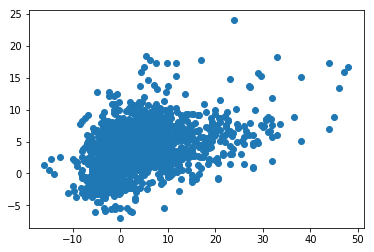

In [86]:
plt.scatter(y3,ypred)

In [87]:
## Now testing it on out of sample

df_test3 = df[(df['DATE']>'2015-1-26') & (df['DATE']<'2015-1-31')]
df_test3 = df_test3[df_test3['AIRLINE'] == 'AA']
df_test3 = df_test3[['SCHEDULED_DEPARTURE','DEPARTURE_DELAY','ORIGIN_AIRPORT']]
df_test3 = df_test3[df_test3['DEPARTURE_DELAY'] <60]

test_encoded = label_encoder.transform(df_test3['ORIGIN_AIRPORT'])
test_encoded = test_encoded.reshape(len(test_encoded),1)
test_onehot_encoded = onehot_encoder.transform(test_encoded)

test_b = df_test3['SCHEDULED_DEPARTURE']
test_b = test_b.values.reshape(len(test_b),1)
test_X = np.hstack((test_onehot_encoded,test_b))

test_y = df_test3['DEPARTURE_DELAY']
test_pred = linmodel.predict(test_X)
mean_squared_error(test_y,test_pred)

141.31164758128043

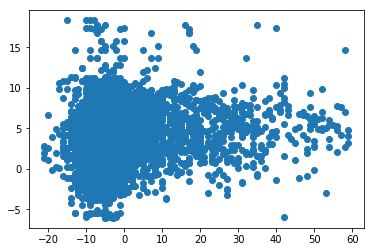

In [88]:
plt.scatter(test_y,test_pred)

In [90]:
## Now using Regularization in Linear Regression

from sklearn.linear_model import Ridge

ridgemodel = Ridge(alpha=0.1,normalize = True)
poly = PolynomialFeatures(degree=2)
X_poly3 = poly.fit_transform(X3)
test_X_poly = poly.fit_transform(test_X)
ridgemodel.fit(X_poly3,y3)
test_pred = ridgemodel.predict(test_X_poly)
mean_squared_error(test_y,test_pred)

139.66331838675512

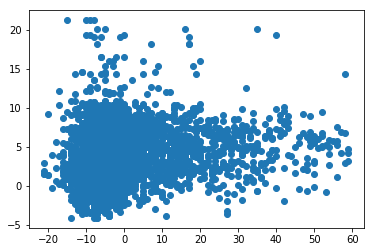

In [91]:
plt.scatter(test_y,test_pred)

0.38091573682185453


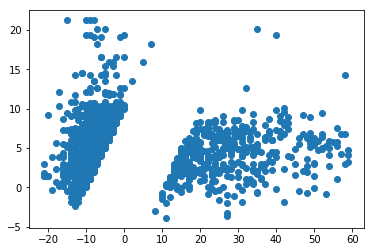

In [92]:
## Find why mean square error is large.
perc = 1
big_orig = []
big_pred = []
count = 0

for i in range(0,test_pred.shape[0]):
    mse = np.absolute((test_y.iloc[i]-test_pred[i]))
    if mse >10: #perc*test_y.iloc[i]:
        big_orig.append(test_y.iloc[i])
        big_pred.append(test_pred[i])
        count += 1

print(count/test_pred.shape[0])
plt.scatter(big_orig,big_pred)

In [95]:
## Now using Lasso Regularization in Linear Regression

from sklearn.linear_model import Lasso

lassomodel = Lasso(alpha=0.1,normalize = True)
poly = PolynomialFeatures(degree=2)
X_poly3 = poly.fit_transform(X3)
test_X_poly = poly.fit_transform(test_X)
lassomodel.fit(X_poly3,y3)
test_pred = lassomodel.predict(test_X_poly)
mean_squared_error(test_y,test_pred)

133.54109938604384

In [265]:
train_X1,test_X1,train_Y1,test_Y1 = train_test_split(X_poly,ynew,test_size=0.25,random_state=42)
ridgemodel.fit(train_X1,train_Y1)
test_pred = ridgemodel.predict(test_X1)
mean_squared_error(test_Y1,test_pred)

64.33128351233266

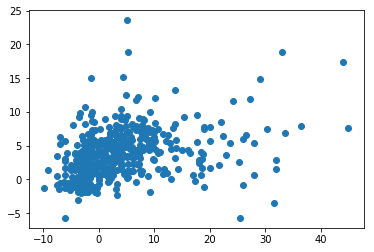

In [212]:
plt.scatter(test_Y1,test_pred)

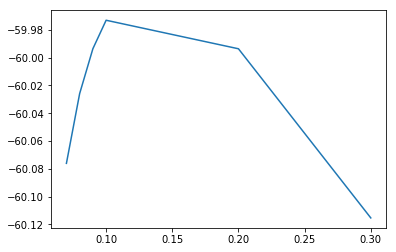

In [96]:
# Grid search using cross validation to find optimum alpha for Ridge

alpha_list = [0.07, 0.08, 0.09, 0.1, 0.2, 0.3]
final_score = []
for alpha in alpha_list:
    ridgemodel = Ridge(alpha=alpha,normalize = True)
    poly = PolynomialFeatures(degree=2)
    X_poly3 = poly.fit_transform(X3)
    scores = cross_val_score(ridgemodel,X_poly3,y3,cv=5,scoring='neg_mean_squared_error')
    final_score.append(np.mean(scores))

plt.plot(alpha_list,final_score)



In [98]:
## Trying random forest
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)
regr.fit(X3,y3.ravel())

test_pred = regr.predict(test_X)
mean_squared_error(test_y,test_pred)


134.49227407180567

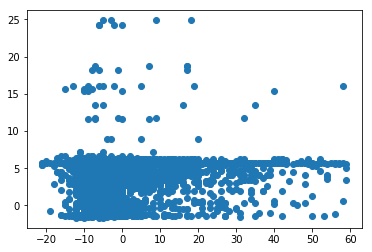

In [246]:
plt.scatter(test_y,test_pred)

In [99]:
### Trying XGBOOST
from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 1, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X3, y3)
test_pred = clf.predict(test_X)
mean_squared_error(test_y, test_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


123.82268131141984

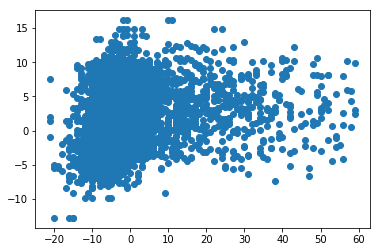

In [322]:
plt.scatter(test_y,test_pred)

In [101]:
## Adding destination airport in feature list
## Instead of destination airport, added scheduled arrival in the feature list

df_train4 = df[(df['DATE']>'2015-1-01') & (df['DATE']<'2015-1-25')]
df_train4 = df_train4[df_train4['AIRLINE'] == 'AA']
df_train4 = df_train4[df_train4['DEPARTURE_DELAY'] < 60 ]
df_train4 = df_train4[['DAY_OF_WEEK','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]

label_encoder4 = LabelEncoder()
label_encoded4 = label_encoder4.fit_transform(df_train4['ORIGIN_AIRPORT'])
label_encoded4 = label_encoded4.reshape(len(label_encoded4),1)

onehot_encoder4 = OneHotEncoder(sparse=False)
onehot_encoded4 = onehot_encoder4.fit_transform(label_encoded4)

b4 = np.array(df_train4[['DAY_OF_WEEK','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL']])

X4 = np.hstack((onehot_encoded4,b4))
y4 = df_train4['DEPARTURE_DELAY']



In [102]:
linmodel4 = linear_model.LinearRegression()
linmodel4.fit(X4,y4)
ypred4 = linmodel4.predict(X4)
mean_squared_error(y4,ypred4)

198.68707462036383

In [109]:
df_test4 = df[(df['DATE']>'2015-1-26') & (df['DATE']<'2015-1-31')]
df_test4 = df_test4[df_test4['AIRLINE'] == 'AA']
df_test4 = df_test4[['DAY_OF_WEEK','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL','ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]
df_test4 = df_test4[df_test4['DEPARTURE_DELAY'] <60]

test_encoded4 = label_encoder4.transform(df_test3['ORIGIN_AIRPORT'])
test_encoded4 = test_encoded4.reshape(len(test_encoded4),1)
test_onehot_encoded4 = onehot_encoder4.transform(test_encoded4)

test_b4 = np.array(df_test4[['DAY_OF_WEEK','SCHEDULED_DEPARTURE','SCHEDULED_ARRIVAL']])

test_X4 = np.hstack((test_onehot_encoded4,test_b4))
test_y4 = df_test4['DEPARTURE_DELAY']

In [110]:
ridgemodel4 = Ridge(alpha=0.1,normalize = True)
poly4 = PolynomialFeatures(degree=2)
X_poly4 = poly4.fit_transform(X4)

ridgemodel4.fit(X_poly4,y4)

test_X_poly4 = poly4.fit_transform(test_X4)
test_pred4 = ridgemodel4.predict(test_X_poly4)
mean_squared_error(test_y4,test_pred4)


128.85561469830782